# ლექცია #14

## კოდების გაშვებისთვის საჭირო ბიბლიოთეკების იმპორტები

ამ ნოუთბუქის გაშვებამდე არ დაგავიწყდეთ საჭირო დამოკიდებულებების (dependencies) დაინსტალირება, რომლებიც მოცემულია `requirements.txt` ფაილში. მარტივად, ტერმინალიდან გაუშვით:

```bash
pip install -r requirements.txt
```

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## სტილის არჩევა გრაფიკებისთვის

`matplotlib`-სა და `seaborn`-ს გააჩნიათ სხვადასხვა სტილი და ფერთა პალიტრა გრაფიკებისთვის. შესაძლებლობა გვაქვს, რომ ნაგულისხმევი სტილისა და ფერთა პალიტრის მაგივრად, ამოვარჩიოთ ჩვენთვის სასურველი სტილი.

უფრო მეტი შეგიძლიათ ნახოთ `matplotlib`-ის სტილზე:

* [სხვადასხვა სტილი](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
* [სახელის მქონე ფერები](https://matplotlib.org/stable/gallery/color/named_colors.html)
* [ფერთა პალიტრის არჩევა](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

უფრო მეტი შეგიძლიათ ნახოთ `seaborn`-ის სტილზე:

* [ფერთა პალიტრის არჩევა](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [ფიგურის ესთეტიკის კონტროლი](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [96]:
sns.set_style("whitegrid")
sns.set_palette("rocket")

# ზუსტად იგივე შესაძლებელია seaborn-ის set ფუნქციით
# sns.set(style="whitegrid", palette="rocket")

## Random Forest-ის მაგალითი ტიტანიკის მონაცემებზე

ტიტანიკის მონაცემები ძალიან ხშირად გამოიყენება DS-სა და ML-ის მაგალითებში. ეს დატასეტი შეიცავს ტიტანიკზე მყოფი ზოგიერთი მგზავრის მონაცემებს. ის შედგება 12 სვეტისგან:

1. **PassengerId** - მგზავრის უნიკალური ID
2. **Survival** - გადარჩა თუ არა მგზავრი. 0 ნიშნავს, რომ ვერ გადარჩა, ხოლო 1 ნიშნავს გადარჩენას
3. **Pclass** - მგზავრის ბილეთის კლასი: 1 - პირველი, 2 - მეორე, 3 - მესამე
4. **Name** - მგზავრის სახელი
5. **Sex** - მგზავრის სქესი: female - ქალი, male - კაცი
6. **Age** - მგზავრის ასაკი წლებში
7. **SibSp** - მგზავრის და-ძმის/ნახევარდის/ნახევარძმის/მეუღლის რაოდენობა ტიტანიკის ბორტზე
8. **Parch** - მგზავრის მშობლების (დედა, მამა)/შვილების (ქალიშვილი, ვაჟიშვილი, გერი) რაოდენობა ტიტანიკის ბორტზე
9. **Ticket** - მგზავრის ბილეთის ნომერი
10. **Fare** - მგზავრის მიერ ბილეთში გადახდილი თანხა
11. **Cabin** - მგზავრის კაბინის ნომერი
12. **Embarked** - მგზავრის ჩასხდომის პორტი: C - Cherbourg, Q - Queenstown, S - Southampton

In [97]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.shape

(891, 12)

თითოეული სვეტის მოკლე ინფორმაციის ნახვა: რამდენი არა-null მნიშვნელობაა მათში და რა ტიპის არიან.

Null მნიშვნელობებს ვუწოდებთ დაკარგულ, გამორჩენილ, გამოტოვებულ მნიშვნელობებს. სტანდარტულად, გამოტოვებული მონაცემები აღინიშნება `NaN`, `NA`, `N/A`, `NAT`, `NULL`, და `None`. თუმცა, ეს იმას არ ნიშნავს, რომ მათ გარდა სხვა არ იქნება.

ძალიამ ხშირია გამოტოვებული მონაცემები, რომელიც ნებისმიერი მიზეზით შეიძლება იყოს ჩვენს მონაცემებში. მათი აღმოჩენა მარტივია, თუმცა როგორ უნდა მოვუაროთ მათ ნამდვილად არაა მარტივი და ბევრ კვლევა-ძიებას მოითხოვს. უფრო მეტიც, შეიძლება იყოს შემთხვევები, როდესაც გვგონია, რომ მონაცემებში არ არის გამოტოვებული მნიშვნელობები, თუმცა შემდეგ სურპრიზად იჩენს თავს.

ძირითადად გამოარჩევენ სამ მიზეზს თუ რატომ შეიძლება მონაცემები იყოს გამოტოვებული:

* **Missing at Random** - ესაა ისეთი გამოტოვებული მონაცემი, როდესაც ვატარებთ გამოკითხვას და ერთ ერთმა რესპოდენტმა არ უპასუხა კითხვას, თუმცა მონაცემებში არის ისეთი მნიშვნელობები, რომლებიც შეგვიძლია გამოვიყენოთ ამ გამოტოვებული მონაცემის შესავსებად.
* **Missing Completely at Random** - თუ გამოტოვებულ მონაცემს არ აქვს არანაირი კავშირი სხვა მნიშვნელობებთან.
* **Missing not at Random** - გამოტოვებულ მონაცემებს სისტემატიური ხასიათი აქვს და გამოწვეულია ისეთი ფატორებისაგან, რომელზეც დაკვირვება შეუძლებელია.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
pd.DataFrame(
    {
        "Number of missing data": df.isna().sum(),
        "Percentage of missing data": (df.isna().sum() / len(df) * 100)
        .round(2)
        .astype(str)
        + "%",
    },
    index=df.columns,
)

,Number of missing data,Percentage of missing data
PassengerId,0,0.0%
Survived,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
Age,177,19.87%
SibSp,0,0.0%
Parch,0,0.0%
Ticket,0,0.0%
Fare,0,0.0%


თითოეული სვეტის აღწერითი სტატისტიკა (რიცხვითი და object ტიპის სვეტების სტატისტიკა ცალ-ცალკეა):

In [101]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


ეტიკეტის სვეტში უნიკალური მნიშვნელობების სიხშირის ნახვა:

In [103]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [104]:
(df["Survived"].value_counts(normalize=True) * 100).round(2).astype(str) + "%"

Survived
0    61.62%
1    38.38%
Name: proportion, dtype: object

**PassengerId** სვეტი ყველა ჩანაწერისთვის უნიკალურია და პროგნოზირებისთვის არანაირი მნიშვნელობა არ აქვს. რაც შეეხება **Ticket** სვეტს, აქაც ბევრი უნიკალური მნიშვნელობაა და თანაც ტექსტური მონაცემია და მისი დამუშავება ცოტა გართულდება. **Cabin** სვეტში კი დაახლოებით 77% გამოტოვებული მნიშვნელობა გვაქვს. ამიტომაც სამივე სვეტს ვშლით, რადგანაც მათ ვერ გამოვიყენებთ, როგორც მახასიათებლებს მოდელის დასატრენინგებლად:

In [105]:
df.drop(columns=["PassengerId", "Ticket", "Cabin"], inplace=True)

რა თქმა უნდა, **Name** სვეტშიც ყველა უნიკალური ჩანაწერია, თუმცა ამ სვეტიდან შეგვიძლია მგზავრის სტატუსზე ამოვიღოთ ინფორმაცია.

1. **Mr** - Mister, შესაძლებელია იყოს დაქორწინებული ან არა
2. **Miss** - გაუთხოვარი ქალი (განსაკუთრებით თუ 30-ზე ნაკლებისაა)
3. **Mrs** - გათხოვილი ქალი
4. **Master** - პატარა ბიჭი
5. **Dr** - დოქტორი (შესაძლებელია ნამდვილად ექიმს ნიშნავდეს)
6. **Rev** - ქრისტიანული ეკლესიის მღვდელი
7. **Mlle** - გაუთხოვარი ქალი
8. **Major** - უფროსი სამხედრო ოფიცერი
9. **Col** - უფროსი სამხედრო ოფიცერი
10. **Countess** - მაღალი სოციალური რანგის მქონე ქალი ან გრაფის ცოლი
11. **Capt** - კაპიტანი
12. **Ms** - გათხოვილი ან გაუთხოვარი ქალი, ხშირად გამოიყენება, როგორც Miss
13. **Sir** - კაცი
14. **Lady** - სპეციფიკური სტატუსის ქალი (ბარონესა, გრაფინია და ა.შ.)
15. **Mme** - ქალი (უმეტეს შემთხვევაში გაუთხოვარი)
16. **Don** - კაცი
17. **Jonkheer** - ახალგაზრდა კაცი/ქალი

In [106]:
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

df.drop(columns=["Name"], inplace=True)

შევამციროთ განსხვავებული სტატუსების რაოდენობა - ანუ სხვადასხვა სტატუსი გავაერთიანოთ ერთ სტატუსში. რეალურად ეს შეგვიძლია გავაკეთოთ ჩანაცვლების ფუნქციონალით, ანუ ჩავანაცვლოთ კონკრეტული სტატუსი სხვა სტატუსით. დავიწყოთ ქალებით:

In [107]:
df[df["Sex"] == "female"]["Title"].value_counts()

Title
Miss        182
Mrs         125
Mlle          2
Mme           1
Ms            1
Lady          1
Countess      1
Dr            1
Name: count, dtype: int64

**Mlle**, **Mme** და **Ms** გადავაქციოთ **Miss**-ად (**Dr**-ს არ ვეხებით, რადგან ამ სტატუსით შეიძლება კაცებიც იყვნენ):

In [108]:
df["Title"] = df["Title"].replace(["Mlle", "Mme", "Ms"], "Miss")

**Countess** ამოვცვალოთ **Lady**-ით:

In [109]:
df["Title"] = df["Title"].replace("Countess", "Lady")

In [110]:
df[df["Sex"] == "female"]["Title"].value_counts()

Title
Miss    186
Mrs     125
Lady      2
Dr        1
Name: count, dtype: int64

გადავიდეთ უკვე კაცების სტატუსებზე:

In [111]:
df[df["Sex"] == "male"]["Title"].value_counts()

Title
Mr          517
Master       40
Rev           6
Dr            6
Major         2
Col           2
Don           1
Sir           1
Capt          1
Jonkheer      1
Name: count, dtype: int64

**Major**, **Col**, **Don**, **Capt** და **Jonkheer** გადავაქციოთ **Sir**-ად:

In [112]:
df["Title"] = df["Title"].replace(["Major", "Col", "Don", "Capt", "Jonkheer"], "Sir")

In [113]:
df[df["Sex"] == "male"]["Title"].value_counts()

Title
Mr        517
Master     40
Sir         8
Rev         6
Dr          6
Name: count, dtype: int64

გარდავქმნათ **Sex** სვეტი ორობით ცვლადად:

In [114]:
df["Sex"] = df["Sex"].map({"female": 0, "male": 1})

მონაცემების 80% გამოვიყენოთ სატრენინგოდ, ხოლოდ დარჩენილი 20% სატესტოდ:

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Survived"]),
    df["Survived"],
    test_size=0.2,
    random_state=1,
    stratify=df["Survived"],
)

In [116]:
print("სატრენინგო მონაცემების ზომა:", X_train.shape, y_train.shape)
print("სატესტო მონაცემების ზომა:", X_test.shape, y_test.shape)

სატრენინგო მონაცემების ზომა: (712, 8) (712,)
სატესტო მონაცემების ზომა: (179, 8) (179,)


აუცილებელია გამოტოვებული მნიშვნელობების შევსება, თანაც უნდა გავითვალისწინოთ, რომ რა მნიშვნელობითაც შევავსებთ სატრენინგოზე, ზუსტად ის უნდა გამოვიყენოთ სატესტო მონაცემებშიც.

In [117]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         139
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [118]:
X_test.isna().sum()

Pclass       0
Sex          0
Age         38
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
dtype: int64

ასაკის სვეტი შეგვიძლია ჩავანაცვლოთ მედიანათი, თუმცა სანამ ამას ვიზამთ, დავაკვირდეთ **Master** სტატუსის მქონე მგზავრებს:

In [119]:
X_train[X_train["Title"] == "Master"].sort_values("Age")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
803,3,1,0.42,0,1,8.5167,C,Master
755,2,1,0.67,1,1,14.5000,S,Master
831,2,1,0.83,1,1,18.7500,S,Master
78,2,1,0.83,0,2,29.0000,S,Master
305,1,1,0.92,1,2,151.5500,S,Master
386,3,1,1.00,5,2,46.9000,S,Master
183,2,1,1.00,2,1,39.0000,S,Master
827,2,1,1.00,0,2,37.0042,C,Master
164,3,1,1.00,4,1,39.6875,S,Master
7,3,1,2.00,3,1,21.0750,S,Master


როგორც ვხედავთ ისინი არიან ბავშვები ძირითადად, ამიტომაც ყველა ასაკის მედიანათი ჩანაცვლება მთლად ლოგიკურად არ ჟღერს. მოდი დავაკვირდეთ ბილეთის კლასის და მგზავრის სტატუსის მიხედვით ასაკობრივ განაწილებას:

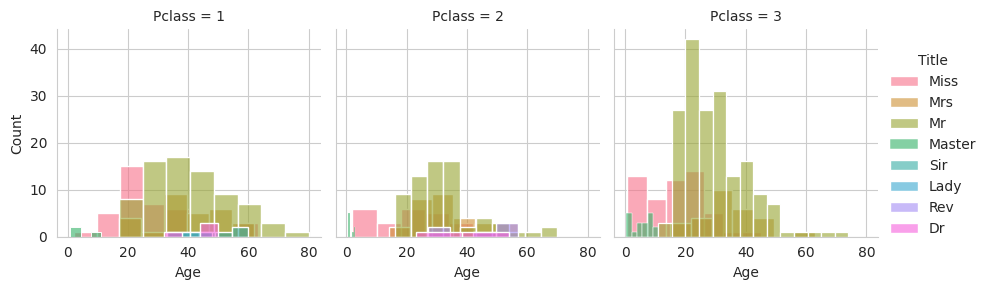

In [120]:
grid = sns.FacetGrid(X_train, col="Pclass", hue="Title")
grid.map(sns.histplot, "Age", alpha=0.6)
grid.add_legend()
plt.show()

გამოვთვალოთ მედიანური ასაკი ბილეთის კლასისა და მგზავრის სტატუსის მიხედვით, რომ შემდგომ გამოვიყენოთ გამოტოვებული მნიშვნელობების ჩასანაცვლებლად. მაგრამ შესაძლებელია ისეთი გამოტოვებული მონაცემი გვქონდეს, რომლისთვისაც არ არსებობს მედიანური ასაკი კლასისა და სტატუსის მიხედვით, ამიტომ გამოვთვალოთ მთლიანი ასაკის მონაცემების მედიანა და ეს გამოვიყენოთ ასეთი მონაცემების შესავსებად:

In [121]:
median_ages = X_train.groupby(["Pclass", "Title"])["Age"].median()
overall_median_age = X_train["Age"].median()

In [122]:
def get_replacement_age(row, median_ages, overall_median_age):
    if pd.isnull(row["Age"]):
        try:
            return median_ages[row["Pclass"], row["Title"]]
        except KeyError:
            return overall_median_age

    return row["Age"]

In [123]:
X_train["Age"] = X_train.apply(
    get_replacement_age, args=(median_ages, overall_median_age), axis="columns"
)

In [124]:
X_test["Age"] = X_test.apply(
    get_replacement_age, args=(median_ages, overall_median_age), axis="columns"
)

In [125]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [126]:
X_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

**Embarked** სვეტის გამოტოვებული მნიშვნელობებისთვის შეგვიძლია გამოვიყენოთ მოდა:

In [127]:
X_train["Embarked"] = X_train["Embarked"].fillna(X_train["Embarked"].mode()[0])

In [128]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

**Age** და **Fare** სვეტები არის უწყვეტი. **Pclass**, **SibSp** და **Parch** არის დისკრეტული და მათ შეგვიძლია მოვექცეთ, როგორც ორდინალურ (რიგითობრივ) მონაცემებს. **Sex**-იც დისკრეტულია, კონკრეტულად კი ორობითი. რაც შეეხება, **Embarked** და **Title** სვეტებიც დისკრეტულია - კონკრეტულად კი კატეგორიული.

In [129]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
368,3,0,18.0,0,0,7.750,Q,Miss
542,3,0,11.0,4,2,31.275,S,Miss
49,3,0,18.0,1,0,17.800,S,Mrs
667,3,1,28.0,0,0,7.775,S,Mr
297,1,0,2.0,1,2,151.550,S,Miss


**Embarked** და **Title** სვეტებზე შეგვიძლია გამოვიყენოთ dummy ენკოდირება, რაც გულისხმობს, რომ თითოეული უნიკალური მნიშვნელობითვის შევქმნით ბინარულ სვეტს. რა თქმა უნდა, რა კატეგორიებიც არის სატრენინგოში, იმავე კატეგორიებით უნდა მოხდეს სატესტოშიც გარდაქმნა:

In [130]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoder.fit(X_train[["Embarked", "Title"]])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [131]:
X_train[list(encoder.get_feature_names_out())] = encoder.transform(
    X_train[["Embarked", "Title"]]
)
X_train.drop(columns=["Embarked", "Title"], inplace=True)

In [132]:
X_test[list(encoder.get_feature_names_out())] = encoder.transform(
    X_test[["Embarked", "Title"]]
)
X_test.drop(columns=["Embarked", "Title"], inplace=True)

რადგანაც მონაცემები მზადაა, შეგვიძლია უკვე მოდელის დატრენინგება და გატესტვა:

In [133]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [134]:
rf = RandomForestClassifier(random_state=1, max_depth=6, n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1)

In [135]:
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

In [136]:
metrics_df = pd.DataFrame(
    {
        "accuracy": [
            accuracy_score(y_train, train_preds),
            accuracy_score(y_test, test_preds),
        ],
        "precision": [
            precision_score(y_train, train_preds),
            precision_score(y_test, test_preds),
        ],
        "recall": [
            recall_score(y_train, train_preds),
            recall_score(y_test, test_preds),
        ],
        "f1": [f1_score(y_train, train_preds), f1_score(y_test, test_preds)],
    },
    index=["სატრენინგო", "სატესტო"],
)
metrics_df

,accuracy,precision,recall,f1
სატრენინგო,0.875000,0.896552,0.761905,0.823762
სატესტო,0.849162,0.828125,0.768116,0.796992


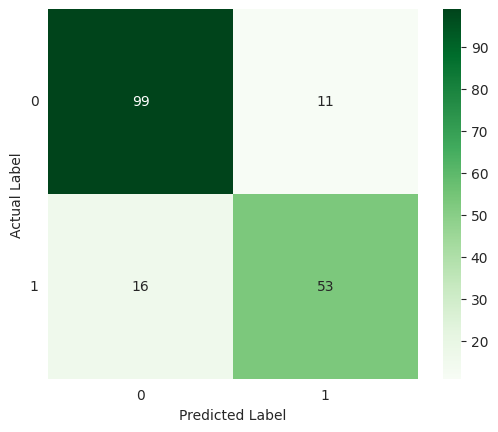

In [137]:
cm = confusion_matrix(y_test, test_preds)

ax = sns.heatmap(cm, annot=True, cmap="Greens", square=True)
ax.tick_params(axis="y", labelrotation=0)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()